Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

# Assignment
1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot

In [1]:
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import pandas as pd
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

Using TensorFlow backend.


((60000, 784), (10000, 784))

In [5]:
import tensorflow as tf
from tensorflow import keras

Documentation for writing callbacks found at:  https://keras.io/guides/writing_your_own_callbacks/ <br>
Documentation for Earlystop at: https://keras.io/api/callbacks/#earlystopping

In [6]:
loss = {}

for i in range(2, 18, 2):
    
    encoding_dim = i 
    
    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)    
    
    autoencoder = Model(input_img, decoded)    
    
    encoder = Model(input_img, encoded)    
    
    encoded_input = Input(shape=(encoding_dim,))    
    
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]    
    
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
        
    autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
    
    loss[i] = autoencoder.evaluate(xtrain, xtrain, verbose = 0)

Epoch 1/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 3/50
235/235 [==============================] - 3s 15ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 4/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 5/50
235/235 [==============================] - 4s 17ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 6/50
235/235 [==============================] - 3s 15ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6926 - val_loss: 0.6926
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6926 - val_lo

235/235 [==============================] - 4s 19ms/step - loss: 0.6912 - val_loss: 0.6912
Epoch 32/50
235/235 [==============================] - 4s 17ms/step - loss: 0.6912 - val_loss: 0.6911
Epoch 33/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6911 - val_loss: 0.6911
Epoch 34/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6910 - val_loss: 0.6910
Epoch 35/50
235/235 [==============================] - 4s 17ms/step - loss: 0.6910 - val_loss: 0.6909
Epoch 36/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6909 - val_loss: 0.6909
Epoch 37/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6908 - val_loss: 0.6908
Epoch 38/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6908 - val_loss: 0.6907
Epoch 39/50
235/235 [==============================] - 5s 23ms/step - loss: 0.6907 - val_loss: 0.6907
Epoch 40/50
235/235 [==============================] - 4s 17ms/step - loss: 0.6906 - val_loss:

235/235 [==============================] - 4s 18ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 12/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 13/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 14/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 15/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6922 - val_loss: 0.6922
Epoch 16/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6921 - val_loss: 0.6921
Epoch 17/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 18/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 19/50
235/235 [==============================] - 4s 19ms/step - loss: 0.6919 - val_loss: 0.6919
Epoch 20/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6919 - val_loss:

235/235 [==============================] - 4s 15ms/step - loss: 0.6902 - val_loss: 0.6901
Epoch 42/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6901 - val_loss: 0.6900
Epoch 43/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6900 - val_loss: 0.6899
Epoch 44/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6899 - val_loss: 0.6898
Epoch 45/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6898 - val_loss: 0.6897
Epoch 46/50
235/235 [==============================] - 3s 15ms/step - loss: 0.6897 - val_loss: 0.6896
Epoch 47/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6896 - val_loss: 0.6895
Epoch 48/50
235/235 [==============================] - 3s 15ms/step - loss: 0.6895 - val_loss: 0.6894
Epoch 49/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6894 - val_loss: 0.6893
Epoch 50/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6893 - val_loss:

235/235 [==============================] - 4s 15ms/step - loss: 0.6901 - val_loss: 0.6900
Epoch 22/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6899 - val_loss: 0.6898
Epoch 23/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6898 - val_loss: 0.6897
Epoch 24/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6896 - val_loss: 0.6895
Epoch 25/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6894 - val_loss: 0.6893
Epoch 26/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6893 - val_loss: 0.6892
Epoch 27/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6891 - val_loss: 0.6890
Epoch 28/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6889 - val_loss: 0.6888
Epoch 29/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6887 - val_loss: 0.6886
Epoch 30/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6885 - val_loss:

In [20]:
loss

{2: 0.6900376677513123,
 4: 0.6899483799934387,
 6: 0.6895860433578491,
 8: 0.6895838975906372,
 10: 0.6892221570014954,
 12: 0.6897948384284973,
 14: 0.6827694773674011,
 16: 0.6865726113319397}

In [21]:
import matplotlib.pyplot as  plt
%matplotlib inline

Text(0, 0.5, 'Loss')

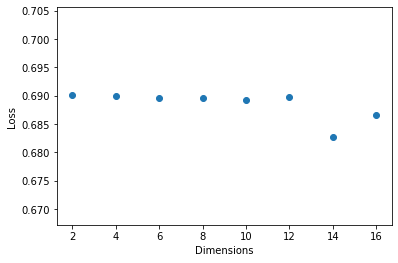

In [27]:
plt.scatter(loss.keys(), loss.values())
plt.xlabel("Dimensions")
plt.ylabel('Loss')

### 2. using the previous assignment's model of detecting images, how does the accuracy change when you run the digit-prediction model on these 'decoded' values?

In [28]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [29]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [31]:
batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

In [33]:
import matplotlib.pyplot as plt

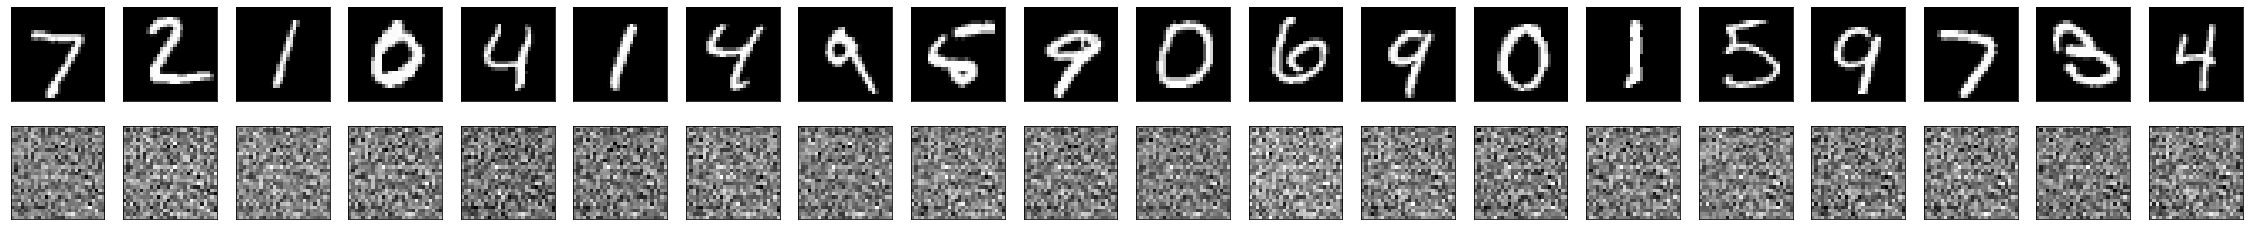

In [34]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [35]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(xtrain, ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(decoded_imgs, ytest))
score_nn = model.evaluate(decoded_imgs, ytest, verbose=0)
print('Test loss:', score_nn[0])
print('Test accuracy:', score_nn[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 8s 18ms/step - loss: 0.2450 - accuracy: 0.9237 - val_loss: 5

### 3. apply noise to *_only_* the input of the autoencoder (not the output). demonstrate that your autoencoder can strip out noise.

In [37]:
xtrain_noise10 = xtrain + np.random.normal(0, 255*.10, xtrain.shape)
xtest_noise10 = xtest + np.random.normal(0, 255*.10, xtest.shape)

In [39]:
autoencoder.fit(xtrain_noise10, xtrain,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest_noise10, xtest),
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/20
235/235 [==============================] - 7s 28ms/step - loss: 0.8259 - val_loss: 0.7846
Epoch 2/20
235/235 [==============================] - 6s 26ms/step - loss: 0.7538 - val_loss: 0.7271
Epoch 3/20
235/235 [==============================] - 6s 26ms/step - loss: 0.7066 - val_loss: 0.6887
Epoch 4/20
235/235 [==============================] - 7s 30ms/step - loss: 0.6740 - val_loss: 0.6608
Epoch 5/20
235/235 [==============================] - 8s 32ms/step - loss: 0.6488 - val_loss: 0.6375
Epoch 6/20
235/235 [==============================] - 7s 32ms/step - loss: 0.6259 - val_loss: 0.6144
Epoch 7/20
235/235 [==============================] - 8s 34ms/step - loss: 0.6015 - val_loss: 0.5884
Epoch 8/20
235/235 [==============================] - 7s 30ms/step - loss: 0.5734 - val_loss: 0.5579
Epoch 9/20
235/235 [==============================] - 7s 28ms/step - loss: 0.5406 - val_loss: 0.5227
Epoch 10/20
235/235 [==============================] - 8s 32ms/step - loss: 0.5036 - val_lo

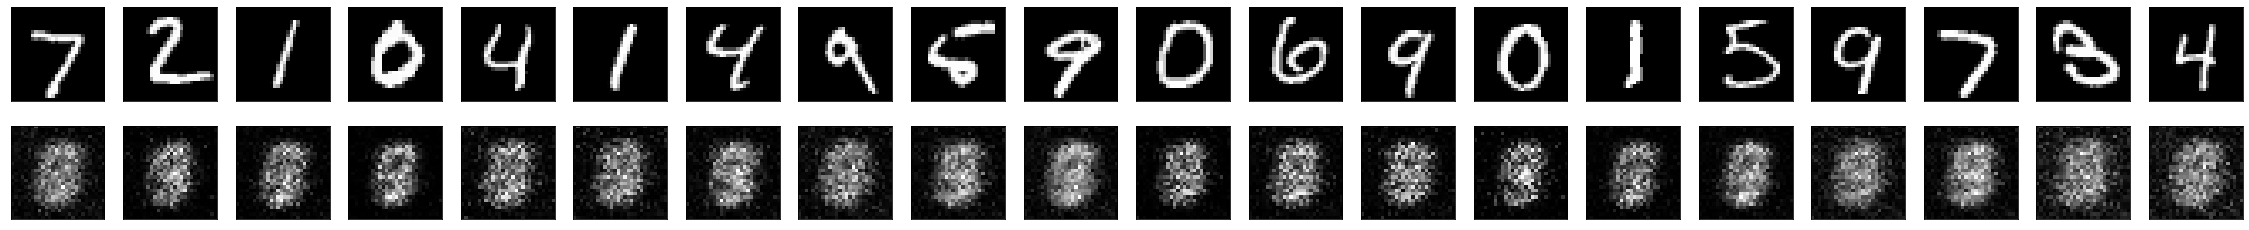

In [40]:
encoded_imgs = encoder.predict(xtest_noise10)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()